In [1]:
import os
import openai
import langchain
import panel as pn
import param

from langchain.embeddings import OpenAIEmbeddings
from langchain.chat_models import ChatOpenAI


embeddings = OpenAIEmbeddings()
llm_name = "gpt-3.5-turbo"
llm = ChatOpenAI(model_name = llm_name, temperature = 0)

In [ ]:
# Converting Docx to Pdf for easier loading

import aspose.words as aw

folder_names = ["patents", "lectures", "articles"]
for folder_name in folder_names:
    os.system(f"rm pdf_docs/{folder_name}/*.pdf")

    for file_name in os.listdir(os.path.join('docx_docs', folder_name)):
        try:
            a = aw.Document(os.path.join('docx_docs', folder_name, file_name))
            a.save(os.path.join('pdf_docs', folder_name, file_name.split('.')[0]+'.pdf'))
        except:
            print(f"Could not convert document {file_name} from {folder_name}")

# TODO: Investigate why The Moon's Rotation 2.docx cannot be converted
# os.remove("pdf_docs/articles/The Moon's Rotation 2.pdf")


In [2]:
# Loading PDF documents

from langchain.document_loaders import PyPDFDirectoryLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter

loader = PyPDFDirectoryLoader(path = "pdf_docs/", recursive = True)
# TODO: Try other values for the text splitter chunk_size and chunk_overlap
text_splitter = RecursiveCharacterTextSplitter(chunk_size = 10000, chunk_overlap = 1000)
pages = loader.load_and_split(text_splitter = text_splitter)

In [3]:
# Removing watermarks from the data

strings_to_remove = ['Evaluation Only. Created with Aspose.Words. Copyright 2003-2023 Aspose Pty \nLtd.',
                    'Evaluation Only. Created with Aspose.Words. Copyright 2003-2023 Aspose Pty Ltd.',
                    'Evaluation Only. Created with Aspose.Words. Copyright 2003-2023 Aspose Pty',
                    'Created with an evaluation copy of Aspose.Words. To discover the full versions \nof our APIs please visit: https://products.aspose.com/words/',
                    'Created with an evaluation copy of Aspose.Words. To discover the full versions',
                    'Created with an evaluation copy of Aspose.Words. To discover the full \nversions of our APIs please visit: https://products.aspose.com/words/',
                    'Created with an evaluation copy of Aspose.Words. To discover the full versions of our \nAPIs please visit: https://products.aspose.com/words/',
                    'of our APIs please visit: https://products.aspose.com/words/',
                    'Created with an evaluation copy of Aspose.Words. To discover the \nfull versions of our APIs please visit: \nhttps://products.aspose.com/words/Evaluation',
                    'Only. Created with Aspose.Words. Copyright 2003-2023 \nAspose Pty Ltd.',
                    'Created with an evaluation copy of Aspose.Words. To discover the',
                    'full versions of our APIs please visit: \nhttps://products.aspose.com/words/',
                    ' of our \nAPIs please visit: https://products.aspose.com/words/'
                    ]

for i, page in enumerate(pages):
    for string in strings_to_remove:
        page.page_content = page.page_content.replace(string, '')
    assert not 'Created with Aspose' in page.page_content, f"Assert failed for page number {i} with content: {page.page_content} from file {page.metadata}"
    assert not 'Aspose' in page.page_content, f"Assert failed for page number {i} with content: {page.page_content} from file {page.metadata}"
    assert not 'Evaluation Only' in page.page_content, f"Assert failed for page number {i} with content: {page.page_content} from file {page.metadata}"
    assert not 'Copyright' in page.page_content, f"Assert failed for page number {i} with content: {page.page_content} from file {page.metadata}"
    assert not 'https://products.aspose.com/words/' in page.page_content, f"Assert failed for page number {i} with content: {page.page_content} from file {page.metadata}"

1494
1323


(array([ 29.,  38.,  44.,  39.,  51.,  54.,  67., 146.,  87., 115., 304.,
        153., 138.,  56.,   2.]),
 array([  15.        ,  382.13333333,  749.26666667, 1116.4       ,
        1483.53333333, 1850.66666667, 2217.8       , 2584.93333333,
        2952.06666667, 3319.2       , 3686.33333333, 4053.46666667,
        4420.6       , 4787.73333333, 5154.86666667, 5522.        ]),
 <BarContainer object of 15 artists>)

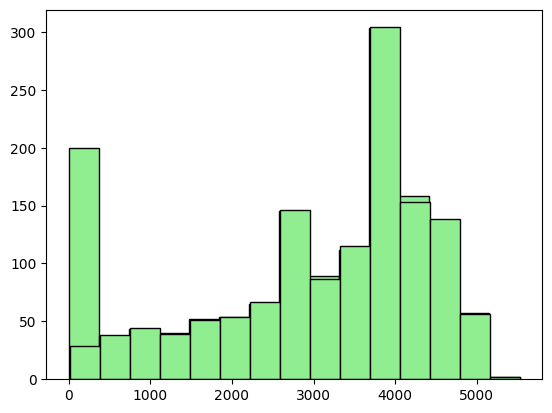

In [5]:
# Metadata extraction and cleanup

import matplotlib.pyplot as plt

print(len(pages))
lens = [len(page.page_content) for page in pages]
plt.hist(lens, color='lightgreen', ec='black', bins=15)

pages = [page for page in pages if page.page_content]

print(len(pages))
lens = [len(page.page_content) for page in pages]
plt.hist(lens, color='lightgreen', ec='black', bins=15)


# TODO: Extract metadata and then remove unneeded pages (too short)


# For
# pages[10].page_content
# print(all_texts[0].page_content)
# a = text_splitter.split_documents(all_texts)
# for aa in a:
#     aa.metadata['source'] = aa.metadata['source'].split('/')[-1]
# a[5].metadata
# all_texts[0].metadata

In [18]:
b = 0
for i, l in enumerate(lens):
    if l < 100:
        print(pages[i])
        b+=1
print(b)
# print(lens.index(5522))
# pages[668].page_content

page_content='NIKOLA TESLA.Witnesses:E. A. SUNDERLIN,D. D. LORD.' metadata={'source': 'pdf_docs/patents/91_PATENT 685,956 .pdf', 'page': 10}
page_content='Witnesses:ROBT. F. GAYLORD,FRANK E. HARTLEY.' metadata={'source': 'pdf_docs/patents/35_PATENT 416,192 .pdf', 'page': 3}
page_content='Witnesses: R. J. STONEY, Jr., E. P. COFFIN.' metadata={'source': 'pdf_docs/patents/37_PATENT 424,036.pdf', 'page': 3}
page_content='ROBT. F. GAYLORD,PARKER W. PAGE.' metadata={'source': 'pdf_docs/patents/54_PATENT 455,069.pdf', 'page': 3}
page_content='M. LAWSON DYER,G. W. MARTLING.' metadata={'source': 'pdf_docs/patents/84_PATENT 609,248 .pdf', 'page': 3}
page_content='ROBT. F. GAYLORD, FRANK E. HARTLEY.' metadata={'source': 'pdf_docs/patents/36_PATENT 416,193 .pdf', 'page': 2}
page_content='M. LAWSON DYER,RICHARD DONOVAN.' metadata={'source': 'pdf_docs/patents/99_PATENT 685,958 .pdf', 'page': 4}
page_content='Witnesses:ROBT. F. GAYLORD, FRANK B. MURPHY.' metadata={'source': 'pdf_docs/patents/19_PATEN

In [ ]:
# Vectorstore loading

vectorstore = Chroma(persist_directory=os.path.join(".", "docs", "merged_vectorstore"), embedding_function = embeddings)

In [ ]:
# Basic Retriever example

from langchain.chains import RetrievalQA
from langchain.memory import ConversationBufferMemory
from langchain.chains import ConversationalRetrievalChain

question = "How many poles shoul my electromotor have, and what should I do if I have the wrong number?"
qa_chain = RetrievalQA.from_chain_type(llm = llm, retriever = vectorstore.as_retriever())
print(qa_chain({"query": question}))

In [ ]:
# Retriever with memory example

from langchain.chains import RetrievalQA
from langchain.memory import ConversationBufferMemory
from langchain.chains import ConversationalRetrievalChain

memory = ConversationBufferMemory(memory_key = "chat_history", return_messages = True)
retriever = vectorstore.as_retriever()
qa = ConversationalRetrievalChain.from_llm(llm = llm, retriever = retriever, memory = memory)
question = input()
print(f"Question: {question}")
print(f"Answer: {qa({'question': question})['answer']}")
question = input()
print(f"Question: {question}")
print(f"Answer: {qa({'question': question})['answer']}")